# Overall top 5 most popular theme

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "..", "data")
data_files = os.listdir(data_folder)
data_files

['part_categories.csv',
 'inventories.csv',
 'parts.csv',
 'inventory_sets.csv',
 'inventory_parts.csv',
 'colors.csv',
 'sets.csv',
 'downloads_schema.png',
 'themes.csv']

In [31]:
sets_path = os.path.join(data_folder, "sets.csv")
themes_path = os.path.join(data_folder, "themes.csv")

sets = pd.read_csv(sets_path)
themes = pd.read_csv(themes_path)

sets.head()
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [32]:
merged = pd.merge(sets, themes, left_on = "theme_id", right_on = "id", how = 'outer')
merged.groupby(by = ["year"])["num_parts"].mean()

year
1950.0     10.142857
1953.0     16.500000
1954.0     12.357143
1955.0     36.857143
1956.0     18.500000
             ...    
2013.0    181.344013
2014.0    169.715288
2015.0    201.669173
2016.0    253.077181
2017.0    260.820946
Name: num_parts, Length: 66, dtype: float64

combine multiple themes with similar names into one:

In [36]:
def merge_themes(df, col_name, themes_list):
    for i in themes_list:
        df[col_name] = df[col_name].apply(lambda x: i if x.startswith(i) else x)
    return df

themes = ["Star Wars", "Disney", "Planet Series", "Spider-Man", "Marvel",
          "Aquaraiders", "Series", "Knights Kingdom", "Matoran", "LEGO",
          "Legoland", "Space Police", "The LEGO", "The Simpsons", "Toa", "Basic"]

merge_themes(merged, "name_y", themes)

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,00-1,Weetabix Castle,1970.0,414.0,471.0,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978.0,84.0,12.0,84,Supplemental,67.0
2,2181-1,Infomaniac,1997.0,84.0,4.0,84,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978.0,84.0,2.0,84,Supplemental,67.0
4,301-1,Curved Road Plates,1978.0,84.0,2.0,84,Supplemental,67.0
...,...,...,...,...,...,...,...,...
11707,NaN,NaN,NaN,NaN,NaN,595,Friends,591.0
11708,NaN,NaN,NaN,NaN,NaN,596,Marvel,591.0
11709,NaN,NaN,NaN,NaN,NaN,597,Nijago,591.0
11710,NaN,NaN,NaN,NaN,NaN,609,The LEGO,535.0


In [38]:
merged['name_y'].value_counts().head(5)

name_y
Star Wars       635
Supplemental    497
Basic           455
Technic         435
Series          409
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 most popular theme')

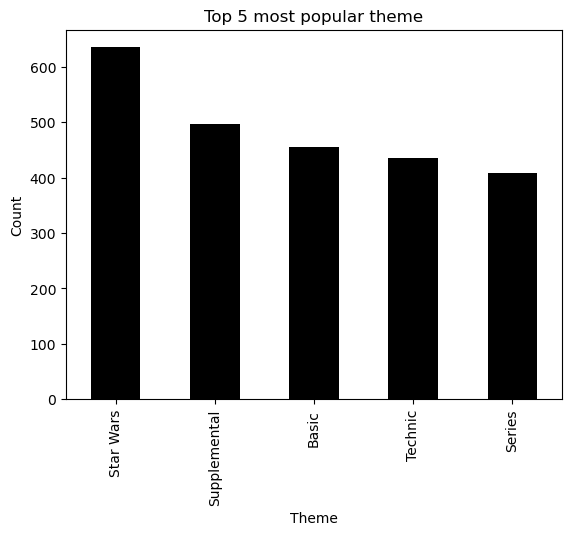

In [48]:
merged['name_y'].value_counts().head(5).plot.bar(color = 'k')
plt.xlabel("Theme")
plt.ylabel("Count")
plt.title("Top 5 most popular theme")